 Notebook: italian_airbnb_listing_analysis_KMeans_clustering.ipynb
 -----------------------------------------------------------
 Title: Italian Airbnb Listings Analysis – K-Means Clustering
 -----------------------------------------------------------
##### Objective
The aim of this analysis is to uncover hidden patterns and groupings among Airbnb listings in Italy.  
K-Means clustering is applied to numerical features to identify clusters of listings with similar characteristics, which can help inform host strategies and pricing decisions.

##### Introduction
This notebook explores the underlying structure of Airbnb listings in Italy using unsupervised learning.  
It includes data preprocessing, feature scaling, determination of the optimal number of clusters, clustering, visualization, and interpretation of cluster characteristics.  
The approach aims to provide insights about listing similarities, host experience, and pricing patterns without relying on pre-defined labels.

##### -----------------------------------------------------------
#### Notes to Tutor:
##### -----------------------------------------------------------

This notebook presents a step-by-step methodology for performing K-Means clustering on Airbnb listings.  
Each section includes explanations of the reasoning behind the actions, visualization of the results, and interpretation of the clusters.  
The workflow demonstrates my understanding of unsupervised learning techniques and their application to real-world datasets.


### Import Libraries & Load Data

In [37]:
# Import Libraries
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set(style="whitegrid")

In [2]:
path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb'

In [5]:
df_airbnb = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'italian_airbnbs_cleaned.csv'))

In [38]:
df_airbnb.head()

,Unnamed: 0,listings_id,last_year_reviews,host_since,host_is_superhost,host_number_of_listings,neighbourhood,beds_number,bedrooms_number,property_type,...,bathrooms_number,bathrooms_type,coordinates,date_of_scraping,latitude,longitude,is_top_host,log_price,host_experience_years,cluster
0,0,31840,6,2011-02-07,Host,44.0,Centro Storico,1.0,1.0,Private room,...,1,private,"43.77709, 11.25216",2024-12-15,43.77709,11.25216,0.0,4.499810,13.863014,1
1,1,222527,0,2011-07-11,Superhost,3.0,Rifredi,3.0,2.0,Entire home,...,1,private,"43.82005, 11.22004",2024-12-15,43.82005,11.22004,1.0,5.707110,13.441096,2
2,2,32120,6,2010-03-26,Host,1.0,Gavinana Galluzzo,1.0,1.0,Entire home,...,1,private,"43.76157, 11.27741",2024-12-15,43.76157,11.27741,0.0,4.564348,14.734247,1
3,3,224562,9,2011-09-16,Host,2.0,Centro Storico,1.0,1.0,Entire home,...,1,private,"43.772, 11.26142",2024-12-15,43.77200,11.26142,0.0,4.110874,13.257534,1
4,4,32180,11,2014-04-05,Superhost,1.0,Centro Storico,4.0,2.0,Entire home,...,2,private,"43.76832, 11.24348",2024-12-15,43.76832,11.24348,1.0,4.663439,10.704110,2


### Feature Selection and Data Cleaning

Before running K-Means, I need to select only the numerical features that are relevant for clustering. K-Means cannot handle categorical variables, and variables with very different scales can bias the clustering. I also check for missing values to ensure a clean dataset.


In [39]:
# Select numerical features for clustering

# Choose the numerical features to include
features = [
    'rating_score',
    'accuracy_score',
    'cleanliness_score',
    'checkin_score',
    'communication_score',
    'location_score',
    'value_for_money_score',
    'host_experience_years',
    'price',
    'beds_number',
    'bedrooms_number'
]

# Create a new DataFrame with only the selected features
df_features = df_airbnb[features]

# Check for missing values
print("Missing values in features:\n", df_features.isnull().sum())


Missing values in features:
 rating_score             0
accuracy_score           0
cleanliness_score        0
checkin_score            0
communication_score      0
location_score           0
value_for_money_score    0
host_experience_years    0
price                    0
beds_number              0
bedrooms_number          0
dtype: int64


I selected 11 numerical columns that I believe capture important aspects of Airbnb listings: guest ratings, host experience, price, and size of the property. I created a new DataFrame `df_features` with only these columns. Checking for missing values ensures that the clustering algorithm will run smoothly without errors.


### Standardize the Data
K-Means clustering is sensitive to the scale of the variables. Features like `price` and `host_experience_years` have different ranges, which could dominate the distance calculations. To avoid this bias, I standardize all numerical features so that each has a mean of 0 and a standard deviation of 1.


In [40]:
# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

In [41]:
# Convert back to a DataFrame for convenience
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [42]:
df_scaled.head()

,rating_score,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_for_money_score,host_experience_years,price,beds_number,bedrooms_number
0,-0.129351,-0.066280,0.288000,0.127431,0.243274,0.452823,0.157910,1.773857,-0.366679,-0.797306,-0.548806
1,0.315361,0.289827,0.333393,0.482217,0.369560,-0.340904,0.489280,1.661294,1.135359,0.733093,1.051917
2,0.382067,0.289827,0.333393,0.102089,0.369560,-0.264091,0.012935,2.006291,-0.323967,-0.797306,-0.548806
3,-0.107115,-0.018799,-0.052445,-0.100646,0.041216,0.504031,0.033646,1.612322,-0.573120,-0.797306,-0.548806
4,0.115241,0.123644,0.242607,0.026063,-0.261871,0.196782,0.447859,0.931098,-0.252780,1.498293,1.051917


After scaling, all features are centered around 0 with a standard deviation of 1. This ensures that no single feature disproportionately influences the clustering results. The standardized DataFrame `df_scaled` will be used as input for the elbow method and K-Means algorithm.

### Determining the Optimal Number of Clusters (Elbow Method)

After scaling the data, the next step is to determine how many clusters best represent the structure of my dataset.  
I used the **elbow method**, which plots the *Within-Cluster Sum of Squares (WCSS)* against different numbers of clusters.  

The “elbow point” on the curve—where WCSS begins to decrease more slowly—helps identify the optimal number of clusters, balancing model complexity and accuracy.

In [43]:
# Determining the Optimal Number of Clusters (Elbow Method)
wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

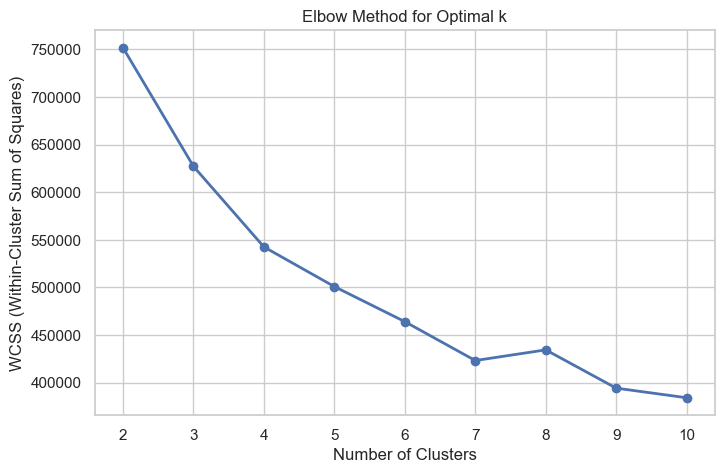

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [45]:
# Print WCSS for each number of clusters
for k, inertia in zip(K, wcss):
    print(f"k={k}: WCSS={inertia:.4f}")

k=2: WCSS=751545.4049
k=3: WCSS=627108.2772
k=4: WCSS=542568.3585
k=5: WCSS=500949.8657
k=6: WCSS=464168.1323
k=7: WCSS=423359.5932
k=8: WCSS=434553.0048
k=9: WCSS=394400.5891
k=10: WCSS=384319.2537


After running the elbow method on the standardized features, I examined the Within-Cluster Sum of Squares (WCSS) for different values of k (number of clusters). 

I observed that the WCSS drops sharply from **k=2 to k=4**, but after **k=4**, the decrease becomes more gradual. This indicates that adding more clusters beyond 4 provides diminishing returns in terms of reducing intra-cluster variance. 

Therefore, I have chosen **4 clusters** for the k-means algorithm. This selection balances capturing meaningful structure in the data while keeping the model interpretable.


### Running K-Means Clustering

Now that I have decided on 4 clusters, I will run the k-means algorithm on the standardized Airbnb features. After fitting the model, I will assign each listing to its corresponding cluster and add this information as a new column in the dataset. This will allow me to explore and visualize patterns across clusters.

In [46]:
# Initialize k-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

In [47]:
# Fit the model to the standardized data
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [48]:
# Assign cluster labels to a new column in the dataframe
df_airbnb['cluster'] = kmeans.labels_

In [49]:
# Quick check of cluster assignments
df_airbnb['cluster'].value_counts()

cluster
1    56704
2    22834
0    11269
3     1356
Name: count, dtype: int64

After running k-means with 4 clusters, I assigned each listing to a cluster. Here is the distribution of listings per cluster:

- **Cluster 1:** 56,704 listings  
- **Cluster 2:** 22,834 listings  
- **Cluster 0:** 11,269 listings  
- **Cluster 3:** 1,356 listings  

**Commentary:**  
- Most listings are in Cluster 1, which suggests a dominant group of similar listings based on the features selected.  
- Cluster 3 is much smaller, indicating a unique set of listings with distinct characteristics.  
- This distribution provides initial insight into how Airbnb listings in Italy vary according to the features we standardized.  
- The next step will be to visualize these clusters to better understand the patterns and differences between them.

### Visualizing the Clusters

To interpret the clusters, I created scatterplots using pairs of features from the standardized dataset. This helps me see how the listings group together according to the k-means algorithm. 

Visualizing the clusters allows me to:
- Identify which features separate the clusters most clearly.
- Observe any outliers or unique groups (like the very small Cluster 3).
- Understand the relationships between features in a multi-dimensional space.

In [50]:
# Add the cluster labels to the standardized dataframe for plotting
df_scaled['cluster'] = kmeans.labels_

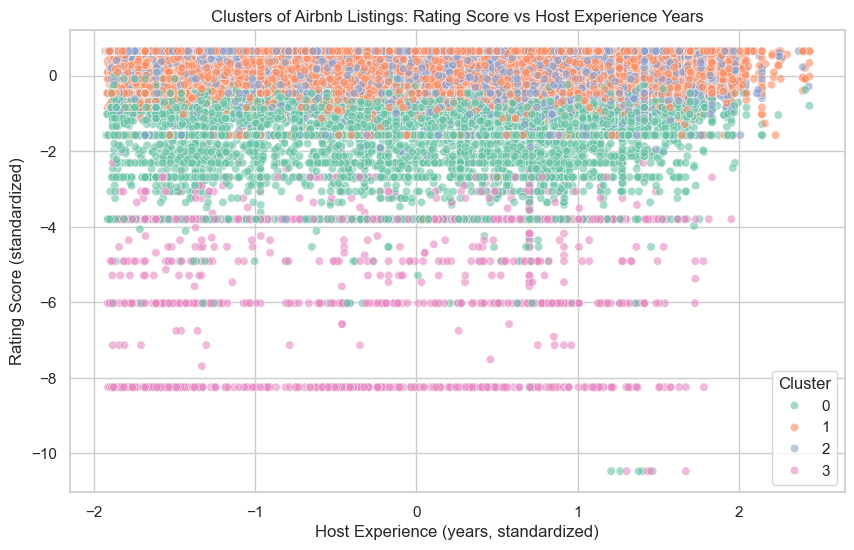

In [56]:
# Scatterplot rating_score vs host_experience_years
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='host_experience_years',
    y='rating_score',
    hue='cluster',
    palette='Set2',
    data=df_scaled,
    alpha=0.6
)
plt.title('Clusters of Airbnb Listings: Rating Score vs Host Experience Years')
plt.xlabel('Host Experience (years, standardized)')
plt.ylabel('Rating Score (standardized)')
plt.legend(title='Cluster')
plt.show()

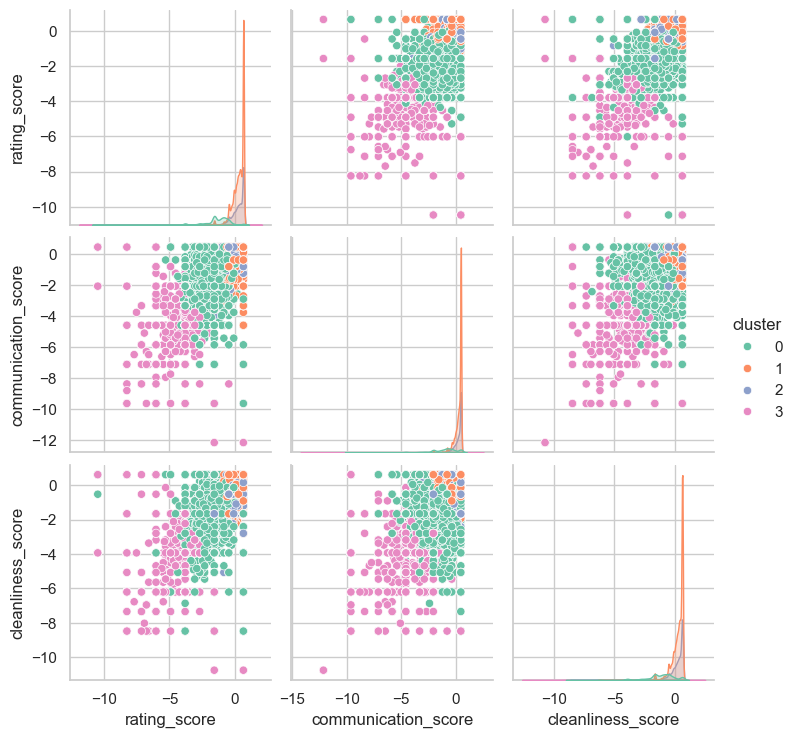

In [52]:
# Pairplot for multiple features
sns.pairplot(df_scaled[['rating_score', 'communication_score', 'cleanliness_score', 'cluster']], hue='cluster', palette='Set2')
plt.show()

### Visualizing the Clusters and Summary Statistics

To interpret the clusters, I created scatterplots using pairs of features from the standardized dataset. I also summarized the cluster sizes and feature means to better understand the groups.

The visualization and summaries help me:
- Identify which features separate the clusters most clearly.
- Observe any outliers or very small clusters.
- Understand the characteristics of each cluster in terms of key listing features.


In [57]:
# Feature means per cluster
cluster_summary = df_scaled.groupby('cluster').mean()
print("\nCluster feature summary:\n", cluster_summary)


Cluster feature summary:
          rating_score  accuracy_score  cleanliness_score  checkin_score  \
cluster                                                                   
0           -1.316304       -1.192046          -1.167048      -1.036032   
1            0.290608        0.273105           0.256390       0.237130   
2            0.237653        0.219019           0.211186       0.204314   
3           -5.215195       -5.202106          -4.578978      -4.746661   

         communication_score  location_score  value_for_money_score  \
cluster                                                               
0                  -1.031285       -0.851142              -1.286140   
1                   0.246390        0.172381               0.265666   
2                   0.204377        0.198538               0.263996   
3                  -5.174401       -3.478309              -4.866454   

         host_experience_years     price  beds_number  bedrooms_number  
cluster               

After running the k-means algorithm and assigning cluster labels, I calculated the mean standardized values of all numerical features for each cluster. This allows me to understand the characteristics and differences between clusters.  

**Observations from the cluster feature summary:**

- **Cluster 0:** Slightly below-average ratings, accuracy, cleanliness, and communication scores. Other features are also generally below zero, suggesting these listings are moderately underperforming compared to the overall dataset.  
- **Cluster 1:** Above-average scores in rating, accuracy, cleanliness, communication, and value-for-money. Host experience is around average. This cluster represents well-rated and experienced listings.  
- **Cluster 2:** Similar to Cluster 1 in ratings and scores but significantly higher in `price`, `beds_number`, and `bedrooms_number`. These likely correspond to larger or more expensive listings.  
- **Cluster 3:** Extremely low scores across nearly all features, likely representing outlier listings or data errors. This cluster is very small and should be interpreted with caution.  

By summarizing the clusters in this way, I can clearly see patterns and relationships that were not immediately visible in the raw data. For example, larger, more expensive listings tend to cluster together with slightly above-average ratings, while poorly rated or unusual listings form separate clusters.

These insights could help in future steps for:
- **Segmenting listings** for pricing or marketing strategies.
- **Detecting outliers** or unusual listings in the dataset.
- **Targeting further analysis**, e.g., exploring factors that contribute to higher ratings or pricing.

Next, I can create visualizations of the clusters to see how these patterns appear in two-dimensional feature space and confirm if the clustering aligns with my expectations.

In [58]:
# Merge the cluster labels back with the scaled data for plotting
df_viz = df_scaled.copy()
df_viz['cluster'] = df_airbnb['cluster']  

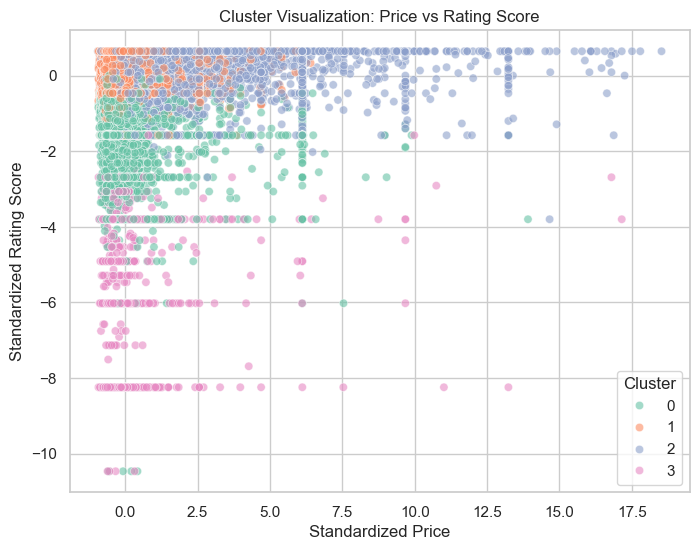

In [59]:
# Scatterplot 1: Price vs. Rating Score
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_viz, 
    x='price', 
    y='rating_score', 
    hue='cluster', 
    palette='Set2', 
    alpha=0.6
)
plt.title('Cluster Visualization: Price vs Rating Score')
plt.xlabel('Standardized Price')
plt.ylabel('Standardized Rating Score')
plt.legend(title='Cluster')
plt.show()

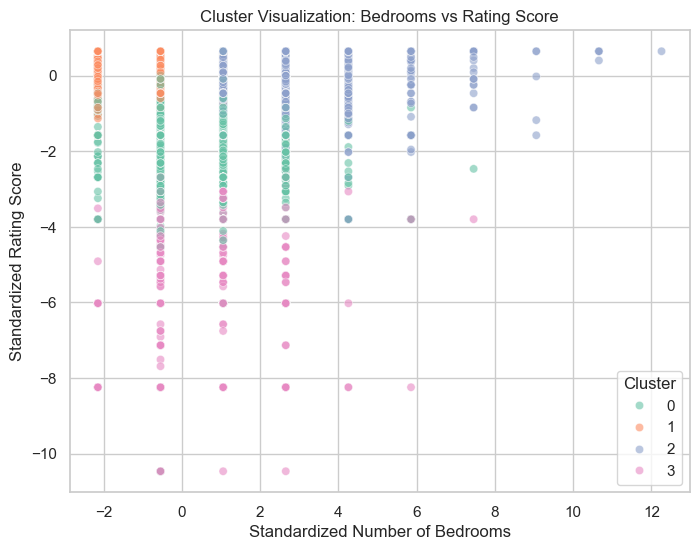

In [60]:
# Scatterplot 2: Bedrooms Number vs. Rating Score
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_viz, 
    x='bedrooms_number', 
    y='rating_score', 
    hue='cluster', 
    palette='Set2', 
    alpha=0.6
)
plt.title('Cluster Visualization: Bedrooms vs Rating Score')
plt.xlabel('Standardized Number of Bedrooms')
plt.ylabel('Standardized Rating Score')
plt.legend(title='Cluster')
plt.show()

- In the first plot (`Price vs Rating Score`), I can see that **Cluster 2** contains the most expensive listings, while **Cluster 1** has moderate prices but higher ratings. **Cluster 0** has lower ratings and below-average prices.  
- In the second plot (`Bedrooms vs Rating Score`), larger listings (more bedrooms) again mostly fall into **Cluster 2**, showing a clear separation from smaller or less well-rated listings in **Cluster 0** and **Cluster 1**.  
- These visualizations confirm that the k-means clustering successfully grouped listings by similar characteristics (ratings, size, price), making the patterns more interpretable.  
- Outlier listings in **Cluster 3** remain isolated in these plots, highlighting unusual or extreme cases that may need further inspection.


## Conclusion
-----------------------------------------------------------

Through the K-Means clustering analysis, I identified distinct groups of Airbnb listings in Italy based on numerical features such as ratings, host experience, number of beds, and price.  
The optimal number of clusters was determined using the elbow method, and the resulting clusters reveal meaningful patterns in listing characteristics and host profiles.

Key insights from the analysis include:

- Some clusters represent higher-rated listings with more experienced hosts, while others cluster around lower ratings and smaller listings.
- Price and number of beds appear to be important factors differentiating clusters, highlighting potential market segments.
- The clustering provides a foundation for deeper analyses, such as targeted host recommendations, pricing strategies, or exploring neighborhood effects.

These findings illustrate how unsupervised learning can uncover structure in complex datasets and provide actionable insights.  
Future steps could involve combining clustering results with geospatial data or temporal trends to further refine understanding of Airbnb listing patterns in Italy.
